In [42]:
import os
import pandas as pd
import pickle
from sklearn import metrics
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import keras
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tldextract

In [43]:
os.listdir('../../images/neuronal_network')

['validation.png']

In [2]:
model=keras.models.load_model('../../../Prototype/code/saved_models/neuronal_network/neuronal_network_tuned_v2.keras',safe_mode=False)

In [3]:
selected_features=pd.read_csv('../../../Prototype/code/hyperparameter_tuning/neuronal_network/v2/neuronal_network_selected_train_features_v2.csv')
selected_features.set_index('url',inplace=True)

In [4]:
selected_features.columns

Index(['https_true', 'url_digits_count', 'url_lenght', 'url_dot_count',
       'url_hyphen_count', 'url_slash_count', 'url_questionmark_count',
       'url_equal_count', 'url_at_count', 'url_and_count', 'url_www_count',
       'url_https_count', 'hostname_lenght', 'hostname_dot_count',
       'hostname_hyphen_count', 'hostname_isip', 'hostname_digits_count',
       'query_lenght', 'query_dot_count', 'query_underline_count',
       'query_slash_count', 'query_equal_count', 'query_and_count',
       'file_lenght', 'file_dot_count', 'file_underline_count',
       'file_hyphen_count', 'html_hl_ratio_int', 'html_hl_ratio_ext',
       'html_hl_ratio_null', 'html_hl_ratio_a_int', 'html_hl_ratio_a_ext',
       'html_hl_ratio_a_null', 'html_hl_ratio_link_int',
       'html_hl_ratio_link_ext', 'html_hl_ratio_src_other_int',
       'html_hl_ratio_src_other_ext', 'html_hl_ratio_media_int',
       'html_hl_ratio_media_ext', 'html_hl_ratio_media_null',
       'html_hl_ratio_form_null', 'html_hl_rati

In [46]:
validation_df=pd.read_csv('../../extracted_features/merged_features/merged_features.csv')
#validation_df.set_index('url',inplace=True)

In [6]:
features=validation_df.loc[:,'https_true':]
label=validation_df.loc[:,'phishing']

In [7]:
label

url
https://developers.facebook.com/docs/workplace/reference?ref=AVsgF6uSqXiUYjAHsyFSUNofDKZQBegjXTnlWWfpFONfT8XHcYasQcKhxbHhzBZALaJRxsGoZ-FkkxuHXdBeNXVUD_AYUxX9dItacAQrurjwjv3khVg1fmdDVpDSz4BLxstDrDpcaNE2XSrA0ZTAvH1-dXvTh5K139zWzabAz9wpO3_F0sbHzHOYIoop_jkpp-VLOQO3HXT1wtWo-loBvWBfw7QAnHhkkniNrgz0mX-MuctdaipBUnm-oIHMq5NiEB2jOT0jeuYlGyFQSqAfNwVbd6_86eDKVNaDg5OlJ-5vowFWiy4YK99uv9r6AIo3Z7ZVj0ucS-2SqUshfszOkhE6kWLGAb1FtZqTPuZCHWYkjj2EJKG1IrGLUo_L-xID-XdiPfk9oSwCz7QofqJqes7PyVaPQBQJM9goMSA87O-qyHCVAKbrhWrsWB55FPsE9G52XgYwU6joYhirycyV0oGx    0
https://developers.facebook.com/docs/workplace/reference?ref=AVsJBmQyVx-4717O4tYWBl9uXRbyzn17CGN4-FDWRFWqQ0Wx5azkVo4yFimTDR5UA3zZk0q1_EVCPU6tZ3RO7bQQb3UyorVL97u_FEyQUohCZJgds_flIHsP_a-a0a7MRhAaGTXM8w0IERA-vcviRevn2uu7Ap5Fo88PnsgrVYJsQwPinEYvVf9vEHagNczRu1U4Xd6a-9Xev1VJEQbGRlBy-OtWCvdBQp_UtFT1vDw4_Z5YVBEwHPn--fQDDIExhrBqkWi8s9-88eCrVou3rQ0FziQzp3nZghuMAY3c6hd-u9EynmpKB5LT76_A1k_AVgd_L7DVAFgM2F_1h1XebjZFgW5Yaqf80N95knoGwrs3iMhWNG5c7bXsUrWR87AqBR0         

In [8]:
features=features[selected_features.columns]

In [45]:
validation_df

KeyError: 0

In [48]:
def testgoogle(df):
    for i in range(len(df)):
        hyperlink=tldextract.extract(df.loc[i]['url']).domain+'.'+ tldextract.extract(df.loc[i]['url']).suffix
        if 'google' in hyperlink:
            print(df.loc[i]['url'])
            df.at[i, 'cantina_new']=1
        else:
            df.at[i, 'cantina_new']=df.loc[i]['cantina']

In [54]:
validation_df_test=validation_df.drop(columns=['cantina'])

In [55]:
validation_df_test

,url,phishing,https_true,url_digits_count,url_lenght,url_dot_count,url_underline_count,url_hyphen_count,url_slash_count,url_questionmark_count,...,html_domain_titel,html_windows_status,html_form_ext_count_mail,html_prompt,html_unsafe_anchor,html_iframe_invisible,html_empty_title,openpagerank,openpagescore,cantina_new
0,https://developers.facebook.com/docs/workplace...,0,1,54,533,2,5,11,5,1,...,0,0,0,0,0,0,0,1,10,1.0
1,https://developers.facebook.com/docs/workplace...,0,1,69,448,2,10,10,5,1,...,0,0,0,0,0,0,0,1,10,1.0
2,https://developers.facebook.com/docs/workplace...,0,1,47,341,2,7,8,5,1,...,0,0,0,0,0,0,0,1,10,1.0
3,https://developers.facebook.com/docs/workplace...,0,1,37,320,2,7,5,5,1,...,0,0,0,0,0,0,0,1,10,1.0
4,https://developers.facebook.com/brad.the.piano...,0,1,17,75,4,0,0,6,0,...,0,0,0,0,0,0,0,1,10,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2791,https://zy2b1r.webwave.dev/,1,1,2,27,2,0,0,3,0,...,0,0,0,0,0,0,0,59359446,2,1.0
2792,https://pub-a74120e6cc664f18a0ed7ff888d4cd91.r...,1,1,20,61,3,0,1,3,0,...,0,0,0,0,1,0,0,33093717,2,0.0
2793,https://fill-the-appeal-form-here.github.io/me...,1,1,0,54,2,0,5,4,0,...,0,0,0,0,0,0,1,620336,4,1.0
2794,http://subeservicios.com/us/delivery/c4fa7aece...,1,0,16,83,1,0,0,7,0,...,0,0,0,0,0,0,1,0,0,0.0


In [56]:
validation_df_test = validation_df_test.rename(columns={'cantina_new': 'cantina'})

In [57]:
validation_df_test

,url,phishing,https_true,url_digits_count,url_lenght,url_dot_count,url_underline_count,url_hyphen_count,url_slash_count,url_questionmark_count,...,html_domain_titel,html_windows_status,html_form_ext_count_mail,html_prompt,html_unsafe_anchor,html_iframe_invisible,html_empty_title,openpagerank,openpagescore,cantina
0,https://developers.facebook.com/docs/workplace...,0,1,54,533,2,5,11,5,1,...,0,0,0,0,0,0,0,1,10,1.0
1,https://developers.facebook.com/docs/workplace...,0,1,69,448,2,10,10,5,1,...,0,0,0,0,0,0,0,1,10,1.0
2,https://developers.facebook.com/docs/workplace...,0,1,47,341,2,7,8,5,1,...,0,0,0,0,0,0,0,1,10,1.0
3,https://developers.facebook.com/docs/workplace...,0,1,37,320,2,7,5,5,1,...,0,0,0,0,0,0,0,1,10,1.0
4,https://developers.facebook.com/brad.the.piano...,0,1,17,75,4,0,0,6,0,...,0,0,0,0,0,0,0,1,10,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2791,https://zy2b1r.webwave.dev/,1,1,2,27,2,0,0,3,0,...,0,0,0,0,0,0,0,59359446,2,1.0
2792,https://pub-a74120e6cc664f18a0ed7ff888d4cd91.r...,1,1,20,61,3,0,1,3,0,...,0,0,0,0,1,0,0,33093717,2,0.0
2793,https://fill-the-appeal-form-here.github.io/me...,1,1,0,54,2,0,5,4,0,...,0,0,0,0,0,0,1,620336,4,1.0
2794,http://subeservicios.com/us/delivery/c4fa7aece...,1,0,16,83,1,0,0,7,0,...,0,0,0,0,0,0,1,0,0,0.0


In [58]:
features_test=validation_df_test.loc[:,'https_true':]
label_test=validation_df_test.loc[:,'phishing']

In [ ]:
features_test

In [59]:
features_test=features_test[selected_features.columns]

In [60]:
features_test

,https_true,url_digits_count,url_lenght,url_dot_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,url_at_count,url_and_count,...,html_hl_ratio_form_null,html_hl_ratio_fav_int,html_hl_ratio_css_int,html_hl_ratio_css_ext,html_hl_external_css,html_unsafe_anchor,html_iframe_invisible,html_empty_title,openpagescore,cantina
0,1,54,533,2,11,5,1,1,0,0,...,0.0,0.0,0.0,1.0,1.0,0,0,0,10,1.0
1,1,69,448,2,10,5,1,1,0,0,...,0.0,0.0,0.0,1.0,1.0,0,0,0,10,1.0
2,1,47,341,2,8,5,1,1,0,0,...,0.0,0.0,0.0,1.0,1.0,0,0,0,10,1.0
3,1,37,320,2,5,5,1,1,0,0,...,0.0,0.0,0.0,1.0,1.0,0,0,0,10,1.0
4,1,17,75,4,0,6,0,0,0,0,...,0.0,0.0,0.0,1.0,1.0,0,0,0,10,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2791,1,2,27,2,0,3,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0,0,0,2,1.0
2792,1,20,61,3,1,3,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,1,0,0,2,0.0
2793,1,0,54,2,5,4,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,4,1.0
2794,0,16,83,1,0,7,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0.0


In [49]:
testgoogle(validation_df)

https://fonts.googleapis.com/css2?family=Montserrat:wght@300;400;500;600;700&display=block
https://fonts.googleapis.com/css2?family=Commissioner:wght@400;500;600;700&family=Inknut+Antiqua:wght@400;700&display=swap
https://fonts.googleapis.com/css?family=Muli%3A400&ver=6.0.2
http://fonts.googleapis.com/css?family=Roboto:100,200,300,400,500,600,700,800,900'%20rel='stylesheet'%20type='text/css
https://fonts.googleapis.com/css?family=Roboto%3A300%2C400%2C500%2C600%2C700%2C300i%2C400i%2C500i%2C600i%7CMuli%3A300%2C400%2C500%2C600%2C700%2C300i%2C400i%2C500i%2C600i%7CKanit%3A300%2C400%2C500%2C600%2C700%2C300i%2C400i%2C500i%2C600i&subset=latin-ext&ver=1.0.0
https://fonts.googleapis.com/css2?family=Libre+Baskerville:wght@700&family=Nunito:wght@400;800&display=swap
https://fonts.googleapis.com/css?family=Kavivanar&ver=6.3.1
https://fonts.googleapis.com/css?family=Barlow+Semi+Condensed%3A1%2C300%2C400%2C400italic%2C500%2C600%2C700%2C700italic&display=swap&ver=4d8c71d9c765dde2d8906fe4a3b7edee
https

In [41]:
features

,https_true,url_digits_count,url_lenght,url_dot_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,url_at_count,url_and_count,...,html_hl_ratio_form_null,html_hl_ratio_fav_int,html_hl_ratio_css_int,html_hl_ratio_css_ext,html_hl_external_css,html_unsafe_anchor,html_iframe_invisible,html_empty_title,openpagescore,cantina
url,,,,,,,,,,,,,,,,,,,,,
https://developers.facebook.com/docs/workplace/reference?ref=AVsgF6uSqXiUYjAHsyFSUNofDKZQBegjXTnlWWfpFONfT8XHcYasQcKhxbHhzBZALaJRxsGoZ-FkkxuHXdBeNXVUD_AYUxX9dItacAQrurjwjv3khVg1fmdDVpDSz4BLxstDrDpcaNE2XSrA0ZTAvH1-dXvTh5K139zWzabAz9wpO3_F0sbHzHOYIoop_jkpp-VLOQO3HXT1wtWo-loBvWBfw7QAnHhkkniNrgz0mX-MuctdaipBUnm-oIHMq5NiEB2jOT0jeuYlGyFQSqAfNwVbd6_86eDKVNaDg5OlJ-5vowFWiy4YK99uv9r6AIo3Z7ZVj0ucS-2SqUshfszOkhE6kWLGAb1FtZqTPuZCHWYkjj2EJKG1IrGLUo_L-xID-XdiPfk9oSwCz7QofqJqes7PyVaPQBQJM9goMSA87O-qyHCVAKbrhWrsWB55FPsE9G52XgYwU6joYhirycyV0oGx,1,54,533,2,11,5,1,1,0,0,...,0.0,0.0,0.0,1.0,1.0,0,0,0,10,1.0
https://developers.facebook.com/docs/workplace/reference?ref=AVsJBmQyVx-4717O4tYWBl9uXRbyzn17CGN4-FDWRFWqQ0Wx5azkVo4yFimTDR5UA3zZk0q1_EVCPU6tZ3RO7bQQb3UyorVL97u_FEyQUohCZJgds_flIHsP_a-a0a7MRhAaGTXM8w0IERA-vcviRevn2uu7Ap5Fo88PnsgrVYJsQwPinEYvVf9vEHagNczRu1U4Xd6a-9Xev1VJEQbGRlBy-OtWCvdBQp_UtFT1vDw4_Z5YVBEwHPn--fQDDIExhrBqkWi8s9-88eCrVou3rQ0FziQzp3nZghuMAY3c6hd-u9EynmpKB5LT76_A1k_AVgd_L7DVAFgM2F_1h1XebjZFgW5Yaqf80N95knoGwrs3iMhWNG5c7bXsUrWR87AqBR0,1,69,448,2,10,5,1,1,0,0,...,0.0,0.0,0.0,1.0,1.0,0,0,0,10,1.0
https://developers.facebook.com/docs/workplace/reference?ref=AVs7jgpP6Ff393iUP16H7uf5f9DvZ7R7n7N0kUF4gxbOGshahrPbsTaX9ATpquxdFw0dVygX69q1BPprCkLdUAFsvF4oJ-rlEUBZY-kYTdD7UlH9UDKX_oT-Zxs6QD9Y-j1paB-DYf35Sj_NRpXM8bl8gs27krjD9zeJhuoQ9nxOQ7tNvut_GkS8QkkPSMVbFAZBV_ayPcgo1l1RW4X_hAgfnnG0kJ541kDiaJAxbhKI_k_hKX3Pu--H4mFtanHaYSe-ni4PsU4yIqyOHxTXEBNK,1,47,341,2,8,5,1,1,0,0,...,0.0,0.0,0.0,1.0,1.0,0,0,0,10,1.0
https://developers.facebook.com/docs/workplace/reference?ref=AVt9DH-HiKZRfphxe_6M0bN244xgrFptqfgOIVzD4hM-dD-_0rXyQWnyGNfFABcAXguxRIWSa3flwFVmOhnm2jASB3aQ9ux7_Na-DOoKoCMtwEZkV9VgTFb0RlgIw2OkZ08IrGFw-n38DEEEwFS0WV6UolAFMq8T1YelJGO_JpUvwGtKdQ9ioVPo6AilGzdkRdgaAJRX6TAuEn6M8LOaszE7Wzhsl8JiuDe4JcX8VMFznbhcMZc735P1m_x_hDyOn_o,1,37,320,2,5,5,1,1,0,0,...,0.0,0.0,0.0,1.0,1.0,0,0,0,10,1.0
https://developers.facebook.com/brad.the.pianoman/videos/10164361892170554/,1,17,75,4,0,6,0,0,0,0,...,0.0,0.0,0.0,1.0,1.0,0,0,0,10,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://zy2b1r.webwave.dev/,1,2,27,2,0,3,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0,0,0,2,1.0
https://pub-a74120e6cc664f18a0ed7ff888d4cd91.r2.dev/shaw.html,1,20,61,3,1,3,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,1,0,0,2,0.0
https://fill-the-appeal-form-here.github.io/meta-hepl/,1,0,54,2,5,4,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,4,1.0


In [61]:
scaler = MinMaxScaler()
scaler.fit(features_test)
features_scaled_test = scaler.transform(features_test)
#X_test_normalized_selected_test = scaler.transform(X_test_selected_test)

In [11]:
y_pred_test = model.predict(features_scaled)
y_pred_test = tf.squeeze(y_pred_test)
y_pred_test = np.array([1 if x >= 0.5 else 0 for x in y_pred_test])

88/88 [==============================] - 0s 678us/step


Accuracy: 0.8261802575107297
Recall: 0.9211850195640022


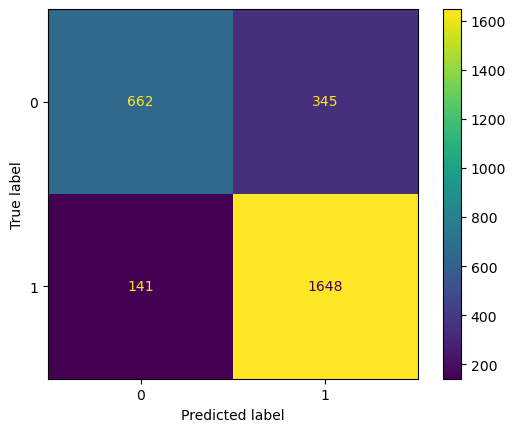

In [12]:
print("Accuracy:",metrics.accuracy_score(label,y_pred_test))
print("Recall:",metrics.recall_score(label, y_pred_test))
conf_mat = confusion_matrix(label,y_pred_test)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat).plot()
plt.savefig('',dpi=300, bbox_inches = "tight")
#plt.savefig('../../images/neuronal_network/validation',dpi=300, bbox_inches = "tight")

In [62]:
y_pred_test = model.predict(features_scaled_test)
y_pred_test = tf.squeeze(y_pred_test)
y_pred_test = np.array([1 if x >= 0.5 else 0 for x in y_pred_test])

88/88 [==============================] - 0s 736us/step


Accuracy: 0.8437052932761088
Recall: 0.9133594186696479


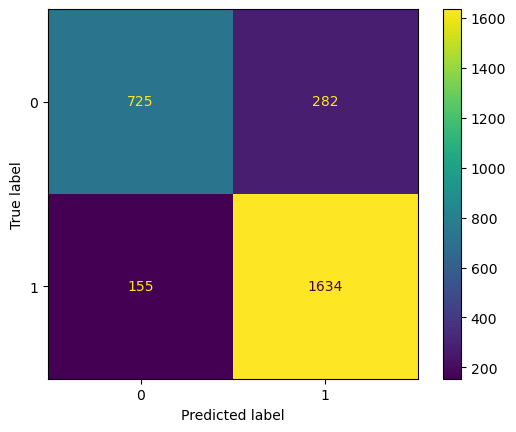

In [63]:
print("Accuracy:",metrics.accuracy_score(label,y_pred_test))
print("Recall:",metrics.recall_score(label, y_pred_test))
conf_mat = confusion_matrix(label,y_pred_test)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat).plot()
plt.savefig('',dpi=300, bbox_inches = "tight")
#plt.savefig('../../images/neuronal_network/validation',dpi=300, bbox_inches = "tight")

In [33]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(label)

url
https://developers.facebook.com/docs/workplace/reference?ref=AVsgF6uSqXiUYjAHsyFSUNofDKZQBegjXTnlWWfpFONfT8XHcYasQcKhxbHhzBZALaJRxsGoZ-FkkxuHXdBeNXVUD_AYUxX9dItacAQrurjwjv3khVg1fmdDVpDSz4BLxstDrDpcaNE2XSrA0ZTAvH1-dXvTh5K139zWzabAz9wpO3_F0sbHzHOYIoop_jkpp-VLOQO3HXT1wtWo-loBvWBfw7QAnHhkkniNrgz0mX-MuctdaipBUnm-oIHMq5NiEB2jOT0jeuYlGyFQSqAfNwVbd6_86eDKVNaDg5OlJ-5vowFWiy4YK99uv9r6AIo3Z7ZVj0ucS-2SqUshfszOkhE6kWLGAb1FtZqTPuZCHWYkjj2EJKG1IrGLUo_L-xID-XdiPfk9oSwCz7QofqJqes7PyVaPQBQJM9goMSA87O-qyHCVAKbrhWrsWB55FPsE9G52XgYwU6joYhirycyV0oGx                                                                                                                                                                                                                                                            0
https://developers.facebook.com/docs/workplace/reference?ref=AVsJBmQyVx-4717O4tYWBl9uXRbyzn17CGN4-FDWRFWqQ0Wx5azkVo4yFimTDR5UA3zZk0q1_EVCPU6tZ3RO7bQQb3UyorVL97u_FEyQUohCZJgds_flIHsP_a-a0a7MRhAaGTXM8w0IERA-vcvi

In [36]:
test=pd.DataFrame(label)

In [64]:
test['predict_new']=y_pred_test

In [65]:
test

,phishing,predict,predict_new
url,,,
https://developers.facebook.com/docs/workplace/reference?ref=AVsgF6uSqXiUYjAHsyFSUNofDKZQBegjXTnlWWfpFONfT8XHcYasQcKhxbHhzBZALaJRxsGoZ-FkkxuHXdBeNXVUD_AYUxX9dItacAQrurjwjv3khVg1fmdDVpDSz4BLxstDrDpcaNE2XSrA0ZTAvH1-dXvTh5K139zWzabAz9wpO3_F0sbHzHOYIoop_jkpp-VLOQO3HXT1wtWo-loBvWBfw7QAnHhkkniNrgz0mX-MuctdaipBUnm-oIHMq5NiEB2jOT0jeuYlGyFQSqAfNwVbd6_86eDKVNaDg5OlJ-5vowFWiy4YK99uv9r6AIo3Z7ZVj0ucS-2SqUshfszOkhE6kWLGAb1FtZqTPuZCHWYkjj2EJKG1IrGLUo_L-xID-XdiPfk9oSwCz7QofqJqes7PyVaPQBQJM9goMSA87O-qyHCVAKbrhWrsWB55FPsE9G52XgYwU6joYhirycyV0oGx,0,1,1
https://developers.facebook.com/docs/workplace/reference?ref=AVsJBmQyVx-4717O4tYWBl9uXRbyzn17CGN4-FDWRFWqQ0Wx5azkVo4yFimTDR5UA3zZk0q1_EVCPU6tZ3RO7bQQb3UyorVL97u_FEyQUohCZJgds_flIHsP_a-a0a7MRhAaGTXM8w0IERA-vcviRevn2uu7Ap5Fo88PnsgrVYJsQwPinEYvVf9vEHagNczRu1U4Xd6a-9Xev1VJEQbGRlBy-OtWCvdBQp_UtFT1vDw4_Z5YVBEwHPn--fQDDIExhrBqkWi8s9-88eCrVou3rQ0FziQzp3nZghuMAY3c6hd-u9EynmpKB5LT76_A1k_AVgd_L7DVAFgM2F_1h1XebjZFgW5Yaqf80N95knoGwrs3iMhWNG5c7bXsUrWR87AqBR0,0,1,1
https://developers.facebook.com/docs/workplace/reference?ref=AVs7jgpP6Ff393iUP16H7uf5f9DvZ7R7n7N0kUF4gxbOGshahrPbsTaX9ATpquxdFw0dVygX69q1BPprCkLdUAFsvF4oJ-rlEUBZY-kYTdD7UlH9UDKX_oT-Zxs6QD9Y-j1paB-DYf35Sj_NRpXM8bl8gs27krjD9zeJhuoQ9nxOQ7tNvut_GkS8QkkPSMVbFAZBV_ayPcgo1l1RW4X_hAgfnnG0kJ541kDiaJAxbhKI_k_hKX3Pu--H4mFtanHaYSe-ni4PsU4yIqyOHxTXEBNK,0,1,1
https://developers.facebook.com/docs/workplace/reference?ref=AVt9DH-HiKZRfphxe_6M0bN244xgrFptqfgOIVzD4hM-dD-_0rXyQWnyGNfFABcAXguxRIWSa3flwFVmOhnm2jASB3aQ9ux7_Na-DOoKoCMtwEZkV9VgTFb0RlgIw2OkZ08IrGFw-n38DEEEwFS0WV6UolAFMq8T1YelJGO_JpUvwGtKdQ9ioVPo6AilGzdkRdgaAJRX6TAuEn6M8LOaszE7Wzhsl8JiuDe4JcX8VMFznbhcMZc735P1m_x_hDyOn_o,0,1,1
https://developers.facebook.com/brad.the.pianoman/videos/10164361892170554/,0,1,1
...,...,...,...
https://zy2b1r.webwave.dev/,1,1,1
https://pub-a74120e6cc664f18a0ed7ff888d4cd91.r2.dev/shaw.html,1,1,1
https://fill-the-appeal-form-here.github.io/meta-hepl/,1,1,1


In [67]:
pd.set_option('display.expand_frame_repr', False)

In [68]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(test)

                                                    phishing  predict  predict_new
url                                                                               
https://developers.facebook.com/docs/workplace/...         0        1            1
https://developers.facebook.com/docs/workplace/...         0        1            1
https://developers.facebook.com/docs/workplace/...         0        1            1
https://developers.facebook.com/docs/workplace/...         0        1            1
https://developers.facebook.com/brad.the.pianom...         0        1            1
https://developers.facebook.com/docs/workplace/...         0        1            1
https://developers.facebook.com/docs/workplace/...         0        1            1
https://developers.facebook.com/docs/workplace/...         0        1            1
https://fonts.googleapis.com/css2?family=Montse...         0        1            1
https://fonts.googleapis.com/css2?family=Commis...         0        1            1
http

In [17]:
y_pred_test[0]

1

In [34]:
type(y_pred_test)

numpy.ndarray

In [20]:
for i in range(len(y_pred_test)):
    print(str(i) + str(y_pred_test[i]))

01
11
21
31
41
51
61
71
81
91
101
111
121
131
141
151
161
171
181
190
201
210
220
230
240
251
261
270
280
290
300
310
320
330
340
350
360
370
380
390
400
411
421
431
440
451
461
470
481
491
501
511
521
531
541
551
561
571
580
590
600
610
620
630
640
650
661
670
680
690
700
710
720
730
740
750
760
771
781
791
801
811
821
831
841
851
861
870
880
890
901
911
920
930
941
950
960
970
980
990
1000
1010
1020
1030
1040
1051
1061
1071
1081
1091
1101
1110
1121
1131
1140
1150
1161
1170
1180
1191
1200
1210
1220
1231
1240
1250
1260
1270
1280
1291
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1491
1500
1511
1521
1531
1541
1551
1561
1571
1581
1591
1601
1611
1621
1631
1641
1651
1661
1671
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1921
1930
1940
1950
1960
1970
1980
1991
2001
2011
2020
2030
2040
2050
2061
2070
2081
2091
2101
2111
2121
2131
2141
2151
2161
2170
2180
2191
2200
2210


In [14]:
y_pred_test

array([1, 1, 1, ..., 1, 1, 1])